# 문제 1

## TIOBE INDEX 상위 9개 언어 + R(14위) : Python, C, Java, C++, C#, Visual Basic, JavaScript, SQL, PHP, R
## 10개 언어에 대한 출판 책 정보 수집하기

---

- 네이버 API 일일 검색량 제한이 25000건
- disp = 1페이지당 100개, startnum = 최대 1000까지

---

- 검색 키워드 수정이 필요해서 다음과 같이 검색.
 
- Python -> Python, 파이썬
- C -> C programming, C 프로그래밍
- Java -> Java, '자바' (JavaScript, 자바스크립트 포함된 결과 목록 제외 필요해보임)
- JavaScript - JavaScript, '자바스크립트'
- C++ -> C++
- C# -> C#
- Visual Basic -> Visual Basic
- SQL -> SQL
- PHP -> PHP
- R -> R programming, R프로그래밍

- 총 검색 결과 16500건 예상

In [218]:
# 필요한 모듈 import
import os
import sys
import json
import datetime
import platform
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [17]:
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in your Windows!!!')
    rc("font", family=font_name)
else:
    print('Unknown system. sorry!!~')

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows!!!


In [2]:
# 네이버 API key
client_id = "RpCSsXQbjViP1An4myaR"
client_secret = "g1hzDn5hAk"

In [3]:
# 단일 검색 결과는 list 형태로 한번에 조회해오기
single_keyword = ['C++', 'C#', 'Visual Basic', 'SQL', 'PHP']

In [6]:
# 책 조회 url 생성 함수
def gen_search_url(search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search/book"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)

    return base + param_query + param_start + param_disp

In [7]:
# 해당 페이지로부터 정보 얻어오기
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now()) # log용 print
    return json.loads(response.read().decode('utf-8'))

In [8]:
# return된 json에서 필요한 정보만 가져오기
url = gen_search_url("Python", 1, 3)
one_result = get_result_onpage(url)

[2021-10-20 11:33:03.338792] Url Request Success


In [9]:
one_result

{'lastBuildDate': 'Wed, 20 Oct 2021 11:33:03 +0900',
 'total': 6671,
 'start': 1,
 'display': 3,
 'items': [{'title': 'Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑하게 코딩하는 법, 개정판)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16876960',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/168/769/16876960.jpg?type=m1&udate=20201222',
   'author': '브렛 슬라킨 지음|오현석',
   'price': '32000',
   'discount': '28800',
   'publisher': '길벗',
   'pubdate': '20201030',
   'isbn': '1165213192 9791165213190',
   'description': '아마존 파이썬 프로그래밍 분야 베스트셀러, 〈Effective <b>Python</b>〉 전면 개정 증보판! \n파이썬의 매력과 강점을 이용해 강력하고 우수한 성능의 코드를 작성하는 90가지 방법!\n파이썬다운 방식으로 프로그램을 작성하는 방법, 파이썬을 사용하는 가장 좋은 방법에 대한 통찰을 담았다! 2판에서는 파이썬 3.... '},
  {'title': '파이썬 딥러닝 파이토치(<b>Python</b> Deep Learning PyTorch)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16778336',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/167/783/16778336.jpg?type=m1&udate=20210929',
   'author': '이경택|방성수|안상준',


In [10]:
# 제목
one_result["items"][0].get("title")

'Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑하게 코딩하는 법, 개정판)'

In [11]:
# 출판사
one_result["items"][0].get("publisher")

'길벗'

In [12]:
# 가격
one_result["items"][0].get("price")

'32000'

In [13]:
# 할인가격
one_result["items"][0].get("discount")

'28800'

In [14]:
# 출판연도
one_result["items"][0].get("pubdate")

'20201030'

In [15]:
# isbn정보
one_result["items"][0].get('isbn')

'1165213192 9791165213190'

In [18]:
# 제목에 붙은 <b> 태그 지우기
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [21]:
# 데이터 프레임화 시키는 함수
def get_fields(keyword, json_data):
    keyword = [keyword] * len(json_data["items"])
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    publisher = [delete_tag(each["publisher"]) for each in json_data["items"]]
    price = [delete_tag(each["price"]) for each in json_data["items"]]
    discount = [delete_tag(each["discount"]) for each in json_data["items"]]
    pubdate = [delete_tag(each["pubdate"]) for each in json_data["items"]]
    isbn = [delete_tag(each["isbn"]) for each in json_data["items"]]

    result_pd = pd.DataFrame({
        "keyword": keyword,
        "title": title,
        "publisher": publisher,
        "price": price,
        "discount": discount,
        "pubdate": pubdate,
        "isbn": isbn
    })

    return result_pd

In [22]:
# 함수 동작 test
test = get_fields("Python", one_result)
test.head()

,keyword,title,publisher,price,discount,pubdate,isbn
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000,28800,20201030,1165213192 9791165213190
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000,22500,20201008,8956748578 9788956748573
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060,,20211005,1680508237 9781680508239


In [24]:
# API로 데이터 검색
# 같은 키워드 검색어 2개인 언어부터
# python, c, java, javascript, r

result_book = []

for n in range(1, 1000, 100):
    url = gen_search_url("Python", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields("Python", json_result)

    result_book.append(pd_result)

result_book = pd.concat(result_book)

[2021-10-20 13:50:55.278176] Url Request Success
[2021-10-20 13:50:55.666292] Url Request Success
[2021-10-20 13:50:56.062262] Url Request Success
[2021-10-20 13:50:56.464241] Url Request Success
[2021-10-20 13:50:56.857571] Url Request Success
[2021-10-20 13:50:57.267454] Url Request Success
[2021-10-20 13:50:57.640998] Url Request Success
[2021-10-20 13:50:58.068701] Url Request Success
[2021-10-20 13:50:58.532170] Url Request Success
[2021-10-20 13:50:58.899927] Url Request Success


In [25]:
result_book.head()

,keyword,title,publisher,price,discount,pubdate,isbn
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000,28800,20201030,1165213192 9791165213190
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000,22500,20201008,8956748578 9788956748573
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060,,20211005,1680508237 9781680508239
3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000,25500,20210225,118557879X 9791185578798
4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730,,20211019,1492056359 9781492056355


In [26]:
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
95,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,53180,,20210221,1801795975 9781801795975
96,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,57380,,20210221,1801795967 9781801795968
97,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,92380,,20210221,1801796009 9781801796002
98,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,104980,,20210221,1801795983 9781801795982
99,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,97980,,20210221,1801795991 9781801795999


In [27]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    1000 non-null   object
 1   title      1000 non-null   object
 2   publisher  1000 non-null   object
 3   price      1000 non-null   object
 4   discount   1000 non-null   object
 5   pubdate    1000 non-null   object
 6   isbn       1000 non-null   object
dtypes: object(7)
memory usage: 62.5+ KB


In [28]:
# 인덱스 재설정
result_book.reset_index(inplace=True)
result_book.tail()

,index,keyword,title,publisher,price,discount,pubdate,isbn
995,95,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,53180,,20210221,1801795975 9781801795975
996,96,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,57380,,20210221,1801795967 9781801795968
997,97,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,92380,,20210221,1801796009 9781801796002
998,98,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,104980,,20210221,1801795983 9781801795982
999,99,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,97980,,20210221,1801795991 9781801795999


In [29]:
del result_book["index"]
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
995,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,53180,,20210221,1801795975 9781801795975
996,Python,Computer Programming: 2 books in 1: LINUX COMM...,JordanEditors,57380,,20210221,1801795967 9781801795968
997,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,92380,,20210221,1801796009 9781801796002
998,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,104980,,20210221,1801795983 9781801795982
999,Python,COMPUTER PROGRAMMING For Beginners: 4 books in...,JordanEditors,97980,,20210221,1801795991 9781801795999


In [30]:
# "파이썬"

tmp_result = []
for n in range(1, 1000, 100):
    url = gen_search_url("파이썬", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields("파이썬", json_result)

    tmp_result.append(pd_result)

tmp_result = pd.concat(tmp_result)

tmp_result.head()

[2021-10-20 13:58:33.697935] Url Request Success
[2021-10-20 13:58:34.060364] Url Request Success
[2021-10-20 13:58:34.409398] Url Request Success
[2021-10-20 13:58:34.747222] Url Request Success
[2021-10-20 13:58:35.064375] Url Request Success
[2021-10-20 13:58:35.386857] Url Request Success
[2021-10-20 13:58:35.744327] Url Request Success
[2021-10-20 13:58:36.136923] Url Request Success
[2021-10-20 13:58:36.523732] Url Request Success
[2021-10-20 13:58:36.897877] Url Request Success


,keyword,title,publisher,price,discount,pubdate,isbn
0,파이썬,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,한빛미디어,34000,30600,20200805,1162243074 9791162243077
1,파이썬,Do it! 점프 투 파이썬,이지스퍼블리싱,18800,16900,20190620,1163030910 9791163030911
2,파이썬,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),한빛미디어,18000,16200,20190610,1162241888 9791162241882
3,파이썬,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),책만,38000,34200,20200715,1189909170 9791189909178
4,파이썬,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",한빛미디어,32000,28800,20200701,1162243201 9791162243206


In [31]:
tmp_result.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
95,파이썬,쿠버네티스 쿡북 (클라우드 네이티브 애플리케이션 구축),에이콘출판,20000,18000,20180912,1161752013 9791161752013
96,파이썬,더 강해지다 Active Defense (실습으로 미리 준비하는 보안 프레임워크),비제이퍼블릭,21000,18900,20191011,1190014505 9791190014502
97,파이썬,오픈 소스 소프트웨어 아키텍처 (25개 애플리케이션으로 배우는),인사이트,36000,32400,20150511,8966261264 9788966261260
98,파이썬,"라즈베리 파이, 상상을 현실로 만드는 프로젝트 입문편 + 라즈베리 파이 키트 세트",영진닷컴,105000,,20181115,8931459610 9788931459616
99,파이썬,"가장 쉬운 하스켈 책 (느긋하지만, 우아하고 세련된 함수형 언어)",비제이퍼블릭,28000,25200,20140225,8994774610 9788994774619


In [32]:
tmp_result.reset_index(inplace=True)
del tmp_result["index"]
tmp_result.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
995,파이썬,쿠버네티스 쿡북 (클라우드 네이티브 애플리케이션 구축),에이콘출판,20000,18000,20180912,1161752013 9791161752013
996,파이썬,더 강해지다 Active Defense (실습으로 미리 준비하는 보안 프레임워크),비제이퍼블릭,21000,18900,20191011,1190014505 9791190014502
997,파이썬,오픈 소스 소프트웨어 아키텍처 (25개 애플리케이션으로 배우는),인사이트,36000,32400,20150511,8966261264 9788966261260
998,파이썬,"라즈베리 파이, 상상을 현실로 만드는 프로젝트 입문편 + 라즈베리 파이 키트 세트",영진닷컴,105000,,20181115,8931459610 9788931459616
999,파이썬,"가장 쉬운 하스켈 책 (느긋하지만, 우아하고 세련된 함수형 언어)",비제이퍼블릭,28000,25200,20140225,8994774610 9788994774619


In [34]:
result_book = pd.concat([result_book, tmp_result])

In [35]:
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
995,파이썬,쿠버네티스 쿡북 (클라우드 네이티브 애플리케이션 구축),에이콘출판,20000,18000,20180912,1161752013 9791161752013
996,파이썬,더 강해지다 Active Defense (실습으로 미리 준비하는 보안 프레임워크),비제이퍼블릭,21000,18900,20191011,1190014505 9791190014502
997,파이썬,오픈 소스 소프트웨어 아키텍처 (25개 애플리케이션으로 배우는),인사이트,36000,32400,20150511,8966261264 9788966261260
998,파이썬,"라즈베리 파이, 상상을 현실로 만드는 프로젝트 입문편 + 라즈베리 파이 키트 세트",영진닷컴,105000,,20181115,8931459610 9788931459616
999,파이썬,"가장 쉬운 하스켈 책 (느긋하지만, 우아하고 세련된 함수형 언어)",비제이퍼블릭,28000,25200,20140225,8994774610 9788994774619


In [36]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    2000 non-null   object
 1   title      2000 non-null   object
 2   publisher  2000 non-null   object
 3   price      2000 non-null   object
 4   discount   2000 non-null   object
 5   pubdate    2000 non-null   object
 6   isbn       2000 non-null   object
dtypes: object(7)
memory usage: 125.0+ KB


In [37]:
# C programming

tmp_result = []
for n in range(1, 1000, 100):
    url = gen_search_url("C programming", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields("C programming", json_result)

    tmp_result.append(pd_result)

tmp_result = pd.concat(tmp_result)

tmp_result.reset_index(inplace=True)
del tmp_result["index"]

result_book = pd.concat([result_book, tmp_result])

[2021-10-20 14:05:01.903200] Url Request Success
[2021-10-20 14:05:02.284116] Url Request Success
[2021-10-20 14:05:02.635531] Url Request Success
[2021-10-20 14:05:02.959378] Url Request Success
[2021-10-20 14:05:03.327197] Url Request Success
[2021-10-20 14:05:03.647411] Url Request Success
[2021-10-20 14:05:03.914394] Url Request Success
[2021-10-20 14:05:04.169180] Url Request Success
[2021-10-20 14:05:04.513483] Url Request Success
[2021-10-20 14:05:04.860631] Url Request Success


In [38]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    3000 non-null   object
 1   title      3000 non-null   object
 2   publisher  3000 non-null   object
 3   price      3000 non-null   object
 4   discount   3000 non-null   object
 5   pubdate    3000 non-null   object
 6   isbn       3000 non-null   object
dtypes: object(7)
memory usage: 187.5+ KB


In [39]:
# C programming

tmp_result = []
for n in range(1, 1000, 100):
    url = gen_search_url("C 프로그래밍", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields("C 프로그래밍", json_result)

    tmp_result.append(pd_result)

tmp_result = pd.concat(tmp_result)

tmp_result.reset_index(inplace=True)
del tmp_result["index"]

result_book = pd.concat([result_book, tmp_result])

[2021-10-20 14:05:33.179353] Url Request Success
[2021-10-20 14:05:33.529968] Url Request Success
[2021-10-20 14:05:33.876992] Url Request Success
[2021-10-20 14:05:34.250106] Url Request Success
[2021-10-20 14:05:34.557224] Url Request Success
[2021-10-20 14:05:34.839637] Url Request Success
[2021-10-20 14:05:35.158468] Url Request Success
[2021-10-20 14:05:35.600063] Url Request Success
[2021-10-20 14:05:35.983079] Url Request Success
[2021-10-20 14:05:36.389546] Url Request Success


In [40]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    4000 non-null   object
 1   title      4000 non-null   object
 2   publisher  4000 non-null   object
 3   price      4000 non-null   object
 4   discount   4000 non-null   object
 5   pubdate    4000 non-null   object
 6   isbn       4000 non-null   object
dtypes: object(7)
memory usage: 250.0+ KB


In [41]:
# 나머지 작업 반복문으로 자동화

double_keyword = ["Java", "자바", "JavaScript", "자바스크립트", "R programming", "R 프로그래밍"]

for keyword in double_keyword:
    tmp_result = []
    for n in range(1, 1000, 100):
        url = gen_search_url(keyword, n, 100)
        json_result = get_result_onpage(url)
        pd_result = get_fields(keyword, json_result)

        tmp_result.append(pd_result)

    tmp_result = pd.concat(tmp_result)

    tmp_result.reset_index(inplace=True)
    del tmp_result["index"]

    result_book = pd.concat([result_book, tmp_result])

[2021-10-20 14:11:31.471861] Url Request Success
[2021-10-20 14:11:31.872757] Url Request Success
[2021-10-20 14:11:32.231694] Url Request Success
[2021-10-20 14:11:32.578888] Url Request Success
[2021-10-20 14:11:33.015542] Url Request Success
[2021-10-20 14:11:33.396684] Url Request Success
[2021-10-20 14:11:33.758329] Url Request Success
[2021-10-20 14:11:34.165867] Url Request Success
[2021-10-20 14:11:34.555286] Url Request Success
[2021-10-20 14:11:34.917010] Url Request Success
[2021-10-20 14:11:35.241171] Url Request Success
[2021-10-20 14:11:35.626280] Url Request Success
[2021-10-20 14:11:35.955946] Url Request Success
[2021-10-20 14:11:36.255987] Url Request Success
[2021-10-20 14:11:36.570909] Url Request Success
[2021-10-20 14:11:36.872866] Url Request Success
[2021-10-20 14:11:37.155555] Url Request Success
[2021-10-20 14:11:37.406089] Url Request Success
[2021-10-20 14:11:37.723140] Url Request Success
[2021-10-20 14:11:38.064782] Url Request Success
[2021-10-20 14:11:38

In [42]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    9576 non-null   object
 1   title      9576 non-null   object
 2   publisher  9576 non-null   object
 3   price      9576 non-null   object
 4   discount   9576 non-null   object
 5   pubdate    9576 non-null   object
 6   isbn       9576 non-null   object
dtypes: object(7)
memory usage: 598.5+ KB


In [43]:
single_keyword

['C++', 'C#', 'Visual Basic', 'SQL', 'PHP']

In [44]:
# 검색 키워드 1개짜리 마찬가지로 반복
for keyword in single_keyword:
    tmp_result = []
    for n in range(1, 1000, 100):
        url = gen_search_url(keyword, n, 100)
        json_result = get_result_onpage(url)
        pd_result = get_fields(keyword, json_result)

        tmp_result.append(pd_result)

    tmp_result = pd.concat(tmp_result)

    tmp_result.reset_index(inplace=True)
    del tmp_result["index"]

    result_book = pd.concat([result_book, tmp_result])

[2021-10-20 14:13:31.524275] Url Request Success
[2021-10-20 14:13:31.877806] Url Request Success
[2021-10-20 14:13:32.191201] Url Request Success
[2021-10-20 14:13:32.523998] Url Request Success
[2021-10-20 14:13:32.838609] Url Request Success
[2021-10-20 14:13:33.186456] Url Request Success
[2021-10-20 14:13:33.526199] Url Request Success
[2021-10-20 14:13:33.871952] Url Request Success
[2021-10-20 14:13:34.202523] Url Request Success
[2021-10-20 14:13:34.609689] Url Request Success
[2021-10-20 14:13:34.987204] Url Request Success
[2021-10-20 14:13:35.316241] Url Request Success
[2021-10-20 14:13:35.668602] Url Request Success
[2021-10-20 14:13:36.008828] Url Request Success
[2021-10-20 14:13:36.374029] Url Request Success
[2021-10-20 14:13:36.737424] Url Request Success
[2021-10-20 14:13:37.197198] Url Request Success
[2021-10-20 14:13:37.559580] Url Request Success
[2021-10-20 14:13:37.902688] Url Request Success
[2021-10-20 14:13:38.189788] Url Request Success
[2021-10-20 14:13:38

In [45]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14576 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    14576 non-null  object
 1   title      14576 non-null  object
 2   publisher  14576 non-null  object
 3   price      14576 non-null  object
 4   discount   14576 non-null  object
 5   pubdate    14576 non-null  object
 6   isbn       14576 non-null  object
dtypes: object(7)
memory usage: 911.0+ KB


In [46]:
# 인덱스 재설정
result_book.reset_index(inplace=True)
result_book.tail()

,index,keyword,title,publisher,price,discount,pubdate,isbn
14571,995,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840,,20180309,0079090486 4910079090481
14572,996,PHP,年を取るほど健康になる! ワンダフルエイジング7つの法則 (PHP文庫) (文庫),PHP硏究所,9750,0,20120904,4569678548 9784569678542
14573,997,PHP,「もの忘れ外來」のボケない技術(テク) (PHP文庫) (文庫),PHP硏究所,9830,0,20120602,4569678351 9784569678351
14574,998,PHP,小さな幸せ物語 (PHP文藝文庫) (文庫),PHP硏究所,9880,0,20120315,4569678114 9784569678115
14575,999,PHP,マンガ最終戰爭論 (PHPコミックス) (單行本(ソフトカバ-)),PHP硏究所,18680,0,20120121,456979596X 9784569795966


In [47]:
del result_book["index"]
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
14571,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840,,20180309,0079090486 4910079090481
14572,PHP,年を取るほど健康になる! ワンダフルエイジング7つの法則 (PHP文庫) (文庫),PHP硏究所,9750,0,20120904,4569678548 9784569678542
14573,PHP,「もの忘れ外來」のボケない技術(テク) (PHP文庫) (文庫),PHP硏究所,9830,0,20120602,4569678351 9784569678351
14574,PHP,小さな幸せ物語 (PHP文藝文庫) (文庫),PHP硏究所,9880,0,20120315,4569678114 9784569678115
14575,PHP,マンガ最終戰爭論 (PHPコミックス) (單行本(ソフトカバ-)),PHP硏究所,18680,0,20120121,456979596X 9784569795966


In [48]:
# 데이터 임시 저장
result_book.to_csv("./naver_book_raw_data.csv", sep=",", encoding='utf-8')

----

# 문제 2

## ISBN 넘버로 중복데이터 제거

In [49]:
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
14571,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840,,20180309,0079090486 4910079090481
14572,PHP,年を取るほど健康になる! ワンダフルエイジング7つの法則 (PHP文庫) (文庫),PHP硏究所,9750,0,20120904,4569678548 9784569678542
14573,PHP,「もの忘れ外來」のボケない技術(テク) (PHP文庫) (文庫),PHP硏究所,9830,0,20120602,4569678351 9784569678351
14574,PHP,小さな幸せ物語 (PHP文藝文庫) (文庫),PHP硏究所,9880,0,20120315,4569678114 9784569678115
14575,PHP,マンガ最終戰爭論 (PHPコミックス) (單行本(ソフトカバ-)),PHP硏究所,18680,0,20120121,456979596X 9784569795966


In [50]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    14576 non-null  object
 1   title      14576 non-null  object
 2   publisher  14576 non-null  object
 3   price      14576 non-null  object
 4   discount   14576 non-null  object
 5   pubdate    14576 non-null  object
 6   isbn       14576 non-null  object
dtypes: object(7)
memory usage: 797.2+ KB


In [51]:
len(result_book['isbn'].unique())

12986

- isbn이 책의 고유 식별 정보라면 14576 - 12986 = 1590건 만큼의 중복 데이터가 존재한다.

In [54]:
result_book = result_book.drop_duplicates(['isbn'])

In [55]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 14575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    12986 non-null  object
 1   title      12986 non-null  object
 2   publisher  12986 non-null  object
 3   price      12986 non-null  object
 4   discount   12986 non-null  object
 5   pubdate    12986 non-null  object
 6   isbn       12986 non-null  object
dtypes: object(7)
memory usage: 811.6+ KB


In [56]:
## 임시저장
result_book.to_csv("./isbn_filter.csv", sep=",", encoding="utf-8")

---

# 문제 3

## 문제2의 결과로부터 각 언어별 출판물의 양 순위 매기고 시각화하기

### 두개의 키워드로 검색했던 언어 통일
- Python, 파이썬 = Python
- C programming, C 프로그래밍 = C
- Java, 자바 = Java
- JavaScript, 자바스크립트 = JavaScript
- R programming, R프로그래밍 = R

In [106]:
result_book = pd.read_csv("./isbn_filter.csv", encoding='utf-8', index_col=0)
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
14571,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840.0,NaN,20180309,0079090486 4910079090481
14572,PHP,年を取るほど健康になる! ワンダフルエイジング7つの法則 (PHP文庫) (文庫),PHP硏究所,9750.0,0.0,20120904,4569678548 9784569678542
14573,PHP,「もの忘れ外來」のボケない技術(テク) (PHP文庫) (文庫),PHP硏究所,9830.0,0.0,20120602,4569678351 9784569678351
14574,PHP,小さな幸せ物語 (PHP文藝文庫) (文庫),PHP硏究所,9880.0,0.0,20120315,4569678114 9784569678115
14575,PHP,マンガ最終戰爭論 (PHPコミックス) (單行本(ソフトカバ-)),PHP硏究所,18680.0,0.0,20120121,456979596X 9784569795966


In [107]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 14575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    12986 non-null  object 
 1   title      12986 non-null  object 
 2   publisher  12985 non-null  object 
 3   price      12969 non-null  float64
 4   discount   6626 non-null   float64
 5   pubdate    12978 non-null  object 
 6   isbn       12985 non-null  object 
dtypes: float64(2), object(5)
memory usage: 811.6+ KB


In [108]:
# drop 컬럼후 인덱스 재정리
result_book.reset_index(inplace=True)
del result_book["index"]

In [109]:
result_book.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
12981,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840.0,NaN,20180309,0079090486 4910079090481
12982,PHP,年を取るほど健康になる! ワンダフルエイジング7つの法則 (PHP文庫) (文庫),PHP硏究所,9750.0,0.0,20120904,4569678548 9784569678542
12983,PHP,「もの忘れ外來」のボケない技術(テク) (PHP文庫) (文庫),PHP硏究所,9830.0,0.0,20120602,4569678351 9784569678351
12984,PHP,小さな幸せ物語 (PHP文藝文庫) (文庫),PHP硏究所,9880.0,0.0,20120315,4569678114 9784569678115
12985,PHP,マンガ最終戰爭論 (PHPコミックス) (單行本(ソフトカバ-)),PHP硏究所,18680.0,0.0,20120121,456979596X 9784569795966


In [110]:
result_book.loc[result_book["keyword"]=="파이썬", "keyword"] = "Python"

In [111]:
result_book[result_book['keyword'] == "파이썬"]

,keyword,title,publisher,price,discount,pubdate,isbn


In [112]:
# 마찬가지 과정으로 나머지 진행
result_book.loc[result_book["keyword"]=="C programming", "keyword"] = "C"
result_book.loc[result_book["keyword"]=="C 프로그래밍", "keyword"] = "C"
result_book.loc[result_book["keyword"]=="자바", "keyword"] = "Java"
result_book.loc[result_book["keyword"]=="자바스크립트", "keyword"] = "JavaScript"
result_book.loc[result_book["keyword"]=="R programming", "keyword"] = "R"
result_book.loc[result_book["keyword"]=="R 프로그래밍", "keyword"] = "R"

In [113]:
# 이제 각 언어별 도서수 개략적으로 확인해보기

result_book["keyword"].value_counts()

Python          1960
C               1930
Java            1871
R               1385
JavaScript      1249
Visual Basic     958
C#               934
SQL              915
PHP              897
C++              887
Name: keyword, dtype: int64

In [114]:
## 임시저장
result_book.to_csv("./keyword_fix.csv", sep=",", encoding='utf-8')

```
아까 isbn 넘버로 한번 중복되는 데이터들을 필터링 하긴 했지만 네이버 책에서 검색해 봣을 당시 자바로 검색하면 자바스크립트 도서에 대한 결과도
같이 섞여 들어 오는것을 알 수 있었다. 따라서 자바와 자바스크립트의 경우 서로 키워드와 맞지 않는 책들을 다시한번 필터링 해주도록 한다.
```

#### Java keyword 안에 JavaScript가 있는 경우

In [64]:
result_book[result_book["keyword"] == "자바"] # 아까 키워드 치환이 제대로 됫나 확인

,keyword,title,publisher,price,discount,pubdate,isbn


In [129]:
tmp = result_book.query('title.str.contains("JavaScript | javascript | 자바스크립트")', engine='python')

In [144]:
tmp[tmp['keyword'] == 'Java']

,keyword,title,publisher,price,discount,pubdate,isbn
3901,Java,Decoupled Django: Understand and Build Decoupl...,Apress,64670.0,NaN,20211018,1484271432 9781484271438
3907,Java,초보자를 위한 JavaScript 200제,정보문화사,25000.0,22500.0,20190310,8956748241 9788956748245
3909,Java,Programacion en JavaScript para principiantes...,CristinaCafagno,43480.0,NaN,20210906,1803668334 9781803668338
3911,Java,JavaScript Cookbook: Programming the Web (Prog...,O'ReillyMedia,99730.0,79290.0,20210907,1492055751 9781492055754
3920,Java,머신러닝 TensorFlow.js JavaScript (자바스크립트와 TensorF...,생각나눔,32000.0,28800.0,20190417,1196672431 9791196672430
...,...,...,...,...,...,...,...
5714,Java,"러닝 웹 디자인 (시작하는 사람을 위한 HTML, CSS, 자바스크립트, 웹 그래픽...",프리렉,38000.0,NaN,20151205,8965401100 9788965401100
5715,Java,jQuery 1.3 + jQuery API 레퍼런스 가이드 세트 (작고 강력한 자바...,위키북스,35000.0,NaN,20110929,8992939930 9788992939935
5716,Java,"웹 프로그래밍 (HTML, 자바스크립트, ASP를 중심으로)",생능출판사,20000.0,NaN,20100220,8970506047 9788970506043
5722,Java,iPhone JavaScript Cookbook (자바스크립트로 만드는 아이폰 애플...,에이콘출판,30000.0,NaN,20120620,8960773115 9788960773110


- 위 결과들은 키워드가 자바이나 사실상 자바스크립트에 관한 서적들의 리스트이다

In [146]:
tmp = tmp[tmp['keyword'] == 'Java']

In [150]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 3901 to 5733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    289 non-null    object 
 1   title      289 non-null    object 
 2   publisher  289 non-null    object 
 3   price      288 non-null    float64
 4   discount   152 non-null    float64
 5   pubdate    289 non-null    object 
 6   isbn       289 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.1+ KB


In [154]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    12986 non-null  object 
 1   title      12986 non-null  object 
 2   publisher  12985 non-null  object 
 3   price      12969 non-null  float64
 4   discount   6626 non-null   float64
 5   pubdate    12978 non-null  object 
 6   isbn       12985 non-null  object 
dtypes: float64(2), object(5)
memory usage: 710.3+ KB


In [155]:
for idx, row in tmp.iterrows():
    result_book = result_book[result_book['isbn'] != row['isbn']]

In [156]:
result_book["keyword"].value_counts()

Python          1960
C               1930
Java            1582
R               1385
JavaScript      1249
Visual Basic     958
C#               934
SQL              915
PHP              897
C++              887
Name: keyword, dtype: int64

- 마찬가지 방법으로 Javascript에 Java가 포함된 경우도 제거

In [159]:
tmp = result_book.query('title.str.contains("Java | 자바 ")', engine='python')

In [160]:
tmp[tmp['keyword'] == 'JavaScript']

,keyword,title,publisher,price,discount,pubdate,isbn
5872,JavaScript,Java Script:Complete Concepts and Techniques 2...,Course,22000.0,NaN,20010000,0789562332 6100789562332
5942,JavaScript,Java Script Unleashed 3/E(BK+CD),Sams,50000.0,NaN,20000000,067231763X 6100672317636
5959,JavaScript,Mastering Java Script and JScript,Manning,48000.0,NaN,19990401,0782124925 6100782124926
5960,JavaScript,"Programming Java: Java Programming, JavaScript...",Lulu.com,47720.0,NaN,20160107,1329779002 9781329779006
5975,JavaScript,Java 2 and JavaScript for C and C++ Programmer...,Wiley,45000.0,NaN,19981101,0471327190 6100471327195
5984,JavaScript,Instant Java Script,McGraw-Hill,48000.0,NaN,20010308,0072129948 6100072129945
6002,JavaScript,Professional Java Script,Wrox,59000.0,0.0,19990923,186100270X 9781861002709
6031,JavaScript,Internet Programming with VBScript and Java Sc...,Course,26000.0,NaN,20000101,0619015233 6100619015236
6057,JavaScript,Building Hybrid Android Apps with Java and Jav...,O'ReillyMedia,25230.0,24370.0,20140416,1449361919 9781449361914
6088,JavaScript,Domino 5 Web Programming with XML Java & Java ...,Que,50000.0,NaN,20000101,0789722755 6100789722750


In [161]:
len(tmp[tmp['keyword'] == 'JavaScript'])

15

- 위의 데이터에서 특별히 자바 도서가 섞여 들어가지 않은것으로 보아 별도의 삭제과정은 거치지 않는다.

In [162]:
## 개략적으로 살펴본 언어별 도서수
result_book["keyword"].value_counts()


Python          1960
C               1930
Java            1582
R               1385
JavaScript      1249
Visual Basic     958
C#               934
SQL              915
PHP              897
C++              887
Name: keyword, dtype: int64

In [167]:
book_count = pd.DataFrame(data=result_book["keyword"].value_counts())
book_count

,keyword
Python,1960
C,1930
Java,1582
R,1385
JavaScript,1249
Visual Basic,958
C#,934
SQL,915
PHP,897
C++,887


In [168]:
book_count.reset_index(inplace=True)

In [169]:
book_count

,index,keyword
0,Python,1960
1,C,1930
2,Java,1582
3,R,1385
4,JavaScript,1249
5,Visual Basic,958
6,C#,934
7,SQL,915
8,PHP,897
9,C++,887


In [170]:
book_count.rename(columns={"keyword": "도서수"}, inplace=True)
book_count

,index,도서수
0,Python,1960
1,C,1930
2,Java,1582
3,R,1385
4,JavaScript,1249
5,Visual Basic,958
6,C#,934
7,SQL,915
8,PHP,897
9,C++,887


In [171]:
book_count.rename(columns={"index": "언어"}, inplace=True)
book_count

,언어,도서수
0,Python,1960
1,C,1930
2,Java,1582
3,R,1385
4,JavaScript,1249
5,Visual Basic,958
6,C#,934
7,SQL,915
8,PHP,897
9,C++,887


In [172]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12697 entries, 0 to 12985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    12697 non-null  object 
 1   title      12697 non-null  object 
 2   publisher  12696 non-null  object 
 3   price      12681 non-null  float64
 4   discount   6474 non-null   float64
 5   pubdate    12689 non-null  object 
 6   isbn       12696 non-null  object 
dtypes: float64(2), object(5)
memory usage: 793.6+ KB


In [173]:
# 총 책에서 차지하는 퍼센티지 비율 추가
book_count["비율"] = book_count["도서수"] / 12697 * 100

In [174]:
book_count

,언어,도서수,비율
0,Python,1960,15.436717
1,C,1930,15.200441
2,Java,1582,12.459636
3,R,1385,10.908089
4,JavaScript,1249,9.836969
5,Visual Basic,958,7.545089
6,C#,934,7.356068
7,SQL,915,7.206427
8,PHP,897,7.064661
9,C++,887,6.985902


### 시각화 1 - 파이차트

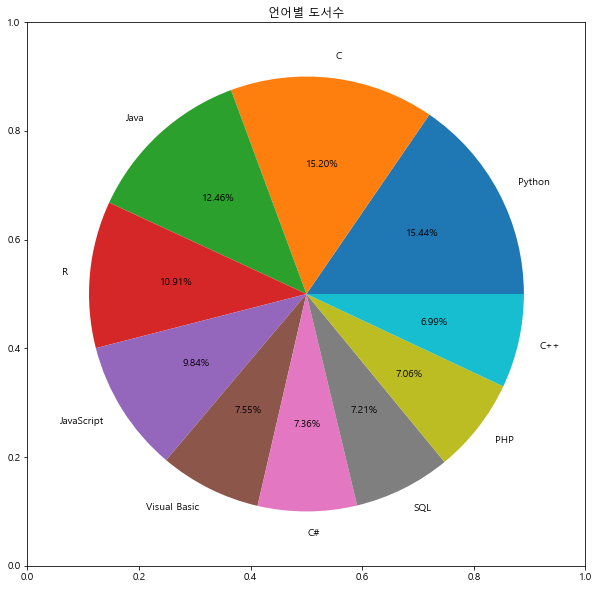

In [180]:
plt.figure(figsize=(10, 10))
plt.title('언어별 도서수')
ax = plt.axes()
ax.set_facecolor('white')
plt.pie(book_count["비율"], labels=book_count["언어"], autopct='%.2f%%')
plt.show()

```
위의 파이차트를 보면 Python, C 언어, Java, R 이 10퍼센트 이상을 차지하고 있고 그 다음으로 높은건 Javascript
나머지 언어들의 도서수는 얼추 비슷해 보인다.
그러나 위의 API로 검색하기전 네이버 책 부분에서 분야별 해외도서수 + 컴퓨터 IT의 도서수를 합한 실질적결과는 다음과 같다.

데이터 출처: naver 책검색
```

In [181]:
ratio = [3982, 8585, 14015, 4769, 5537, 2192, 6361, 7425, 9147, 2067]
labels = ['Python', 'C', 'Java', 'JavaScript', 'C++', 'C#', 'Visual Basic', 'SQL', 'PHP', 'R']

- 위 데이터는 실제 네이버 책의 검색에서 중복등의 데이터를 고려하지 않고 rough하게 분야별 검색된 도서의 수만 합한 결과이다
- 저결과만 봐도 알수 있듯이 국내 java의 유행으로 java 관련 도서가 압도적으로 많은 것을 확인할 수 있었다.

In [185]:
real_ratio = []
for item in ratio:
    real_ratio.append(round(item/sum(ratio) * 100, 2))

real_ratio

[6.21, 13.4, 21.87, 7.44, 8.64, 3.42, 9.93, 11.59, 14.27, 3.23]

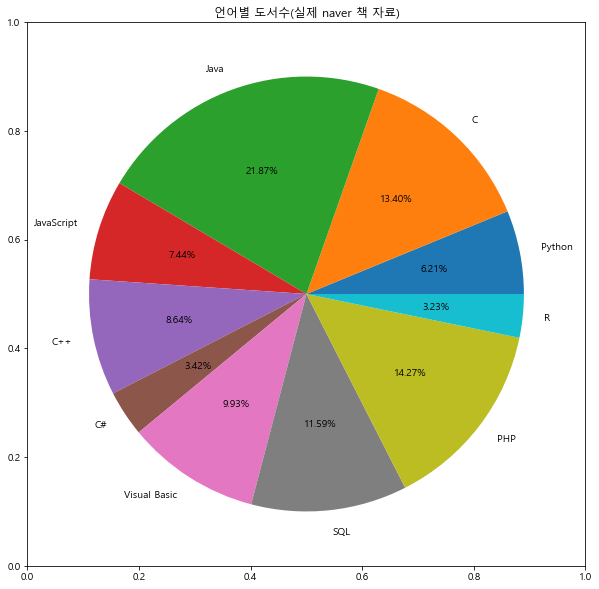

In [186]:
plt.figure(figsize=(10, 10))
plt.title('언어별 도서수(실제 naver 책 자료)')
ax = plt.axes()
ax.set_facecolor('white')
plt.pie(real_ratio, labels=labels, autopct='%.2f%%')
plt.show()

```
아까와는 확연한 차이를 느낄수 있다. 이런결과의 차이가 나는건 아마도 naver api 검색수 제한이 가장 큰 영향을 줫음을 알 수 있다.
1000건에 대한 검색밖에 수행하지 못하므로 실제 검색해오지 못한 자료들이 많을수도 있다. 또한 키워드 별로 검색수가 천차만별로 차이가 나기 때문에
실질적 분석을 위해선 더 많은 자료들을 수집해올 필요성이 있어보인다.
```

## 바 차트를 통한 분석

In [190]:
rank_list = book_count.sort_values("비율", ascending=True)
rank_list

,언어,도서수,비율
9,C++,887,6.985902
8,PHP,897,7.064661
7,SQL,915,7.206427
6,C#,934,7.356068
5,Visual Basic,958,7.545089
4,JavaScript,1249,9.836969
3,R,1385,10.908089
2,Java,1582,12.459636
1,C,1930,15.200441
0,Python,1960,15.436717


No handles with labels found to put in legend.


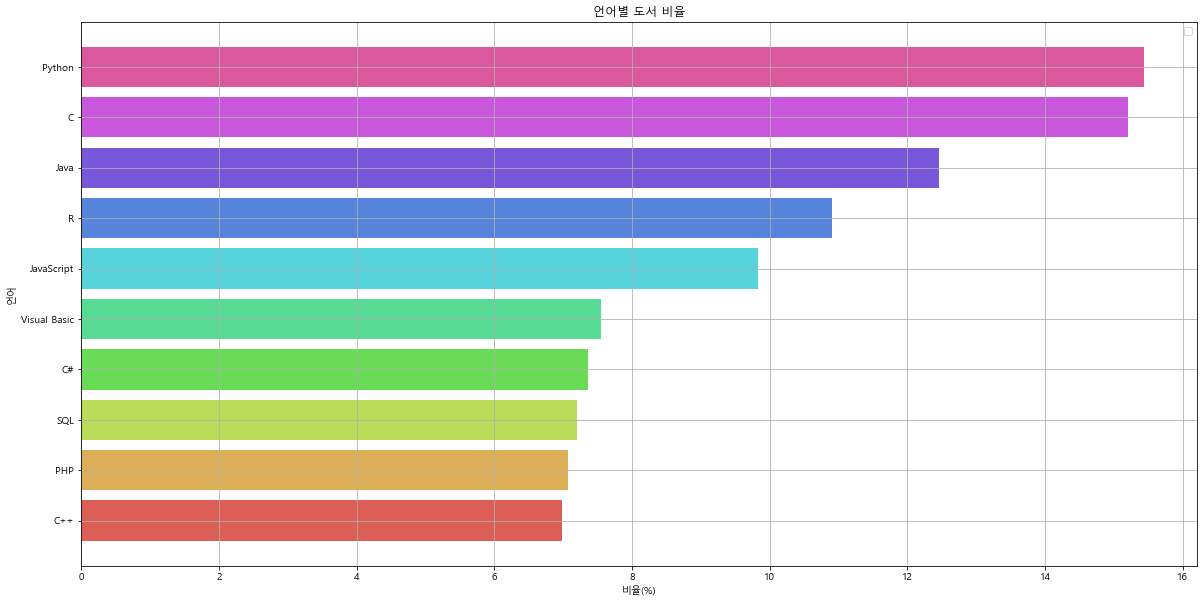

In [234]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls', len(rank_list["언어"]))
plt.barh(rank_list["언어"], rank_list["비율"], color=colors)
plt.legend()
plt.grid(True)
plt.title('언어별 도서 비율')
plt.xlabel("비율(%)")
plt.ylabel("언어")
plt.show()

```
API를 통해 얻은 데이터에 의하면 Python과 C 언어에 대한 도서가 가장 많은것으로 나오고 그 다음으로
Java, R, JavaScript순으로 도서가 많다고 결과가 나오고 있다.
```

---

# 문제4

## 수집된 정보를 기반으로 우리나라 컴퓨터 언어 관련 출판사 순위 확인해 보기

- 국내 출판사 순위의 기준은 가장 많은 도서를 출판한 출판사라 가정

In [199]:
result_book["publisher"].value_counts()

에이콘출판              427
한빛미디어              388
PHP硏究所             343
Wrox               313
PacktPublishing    313
                  ... 
책읽는수요일               1
시크릿하우스               1
힐북                   1
한양대학교출판부             1
LuluPress,Inc.       1
Name: publisher, Length: 1569, dtype: int64

In [202]:
pubisher_list = pd.DataFrame(data=result_book["publisher"].value_counts())
len(pubisher_list)

1569

In [203]:
pubisher_list.reset_index(inplace=True)
pubisher_list.head()

,index,publisher
0,에이콘출판,427
1,한빛미디어,388
2,PHP硏究所,343
3,Wrox,313
4,PacktPublishing,313


In [204]:
pubisher_list.rename(columns={"index": "출판사", "publisher": "도서수"}, inplace=True)
pubisher_list.tail()

,출판사,도서수
1564,책읽는수요일,1
1565,시크릿하우스,1
1566,힐북,1
1567,한양대학교출판부,1
1568,"LuluPress,Inc.",1


- 위 데이터는 전세계 출판사가 섞여 있다. 여기서 한국 출판사만 필터링 해보도록 하자

In [205]:
pubisher_list[pubisher_list["출판사"].str.contains(r'[가-힣]')]

,출판사,도서수
0,에이콘출판,427
1,한빛미디어,388
5,정보문화사,252
6,영진닷컴,231
8,위키북스,172
...,...,...
1563,DK로드북스,1
1564,책읽는수요일,1
1565,시크릿하우스,1
1566,힐북,1


In [206]:
len(pubisher_list[pubisher_list["출판사"].str.contains(r'[가-힣]')])

678

In [207]:
korea_publisher = pubisher_list[pubisher_list["출판사"].str.contains(r'[가-힣]')]
korea_publisher.reset_index(inplace=True)
korea_publisher.tail()

,index,출판사,도서수
673,1563,DK로드북스,1
674,1564,책읽는수요일,1
675,1565,시크릿하우스,1
676,1566,힐북,1
677,1567,한양대학교출판부,1


In [208]:
del korea_publisher["index"]

In [209]:
korea_publisher.tail()

,출판사,도서수
673,DK로드북스,1
674,책읽는수요일,1
675,시크릿하우스,1
676,힐북,1
677,한양대학교출판부,1


In [210]:
korea_publisher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   출판사     678 non-null    object
 1   도서수     678 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.7+ KB


In [211]:
korea_publisher.describe()

,도서수
count,678.000000
mean,8.325959
std,29.764387
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,427.000000


In [214]:
korea_publisher.head(10)

,출판사,도서수
0,에이콘출판,427
1,한빛미디어,388
2,정보문화사,252
3,영진닷컴,231
4,위키북스,172
5,길벗,161
6,성안당,119
7,제이펍,108
8,인사이트,94
9,홍릉과학출판사,94


- 개략적으로 살펴보면 출판 도서수의 중간값은 8권 정도, 4권 정도만 출판한 출판사는 전체 75퍼센트에해당한다.
위 데이터를 보면 알 수 있듯이 대부분 소수의 출판사가 거의 대부분의 책을 내고 있음을 알 수 있다.

### 시각화

- 실제 출판사는 678개 이나 상위 30 군데의 데이터만 차트를 통해확인해 보도록 한다.
(안그러면 그래프 가독성이 너무 떨어짐)

In [230]:
tmp_kor = korea_publisher.iloc[:30]

In [231]:
tmp_kor.tail()

,출판사,도서수
25,퍼플,40
26,복두출판사,38
27,북스홀릭퍼블리싱,38
28,사이버출판사,38
29,기전연구사,36


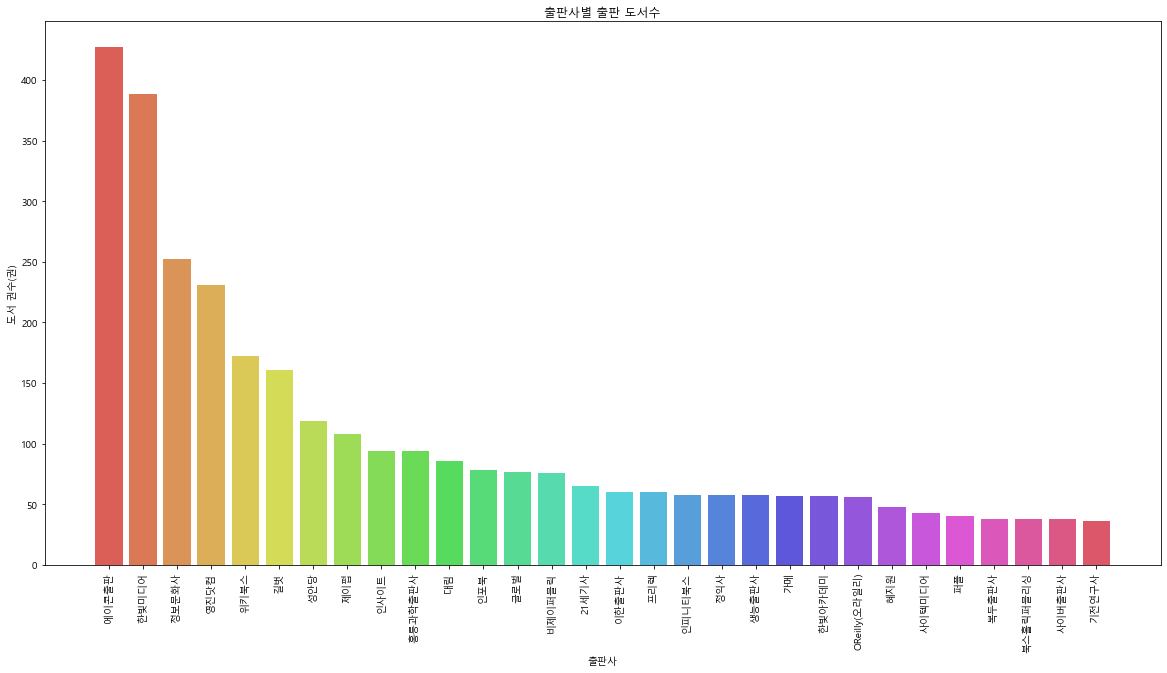

In [235]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls', len(tmp_kor["출판사"]))
plt.bar(tmp_kor["출판사"], tmp_kor["도서수"], color=colors)
plt.title('출판사별 출판 도서수')
plt.xlabel("출판사")
plt.ylabel("도서 권수(권)")
plt.xticks(rotation=90)
plt.show()

```
위 결과를 보면 75퍼센트의 출판사는 평균 1권정도의 책을 출간했으나 상위 30군대의 출판사는 적개는 50권 많게는 400권이 넘는 책을 출간했다.
특이 에이콘출판, 한빛미디어는 압도적으로 많은 책을 출간했다.
```

---

# 문제 5

## 출판일 기준 20년, 21년 그리고 17,18,19년 데이터를 비교해서 특이점 찾아보기

In [236]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12697 entries, 0 to 12696
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      12697 non-null  int64  
 1   keyword    12697 non-null  object 
 2   title      12697 non-null  object 
 3   publisher  12696 non-null  object 
 4   price      12681 non-null  float64
 5   discount   6474 non-null   float64
 6   pubdate    12689 non-null  object 
 7   isbn       12696 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 793.7+ KB


- pubdate 칼럼 datetime으로 변환하기
- csv파일을 열어보면 discount 데이터가 없는경우 pubdate가 밀려간 경우가 있엇다.
- 이 결측치들을 다시한번 정리하도록 한다.
- 하지만 예외인 경우가 너무 많아 앞의 연도만 잘라와 새로운 그룹을 만들도록 하겠다.

In [302]:
# 2021년, 2020년 출판된 게시물

group1 = []
for idx, row in result_book.iterrows():
    if str(row["pubdate"])[:4] == '2020' or str(row["pubdate"])[:4] == '2021':
        group1.append(row)

len(group1)

2500

In [303]:
# 2017년 ~ 2019년 출판된 게시물

group2 = []
for idx, row in result_book.iterrows():
    if str(row["pubdate"])[:4] == '2017' or str(row["pubdate"])[:4] == '2018' or str(row["pubdate"])[:4] == '2019':
        group2.append(row)

len(group2)

2083

- 위 데이터를 보면 2017년부터 2019년까지 3년간 출판된 책보다 2020년부터 올해까지 출간된 책이 더 많음을 알 수 있다.

In [307]:
group_one = pd.DataFrame(data=group1)
group_one.head()

,index,keyword,title,publisher,price,discount,pubdate,isbn
0,0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,28800.0,20201030,1165213192 9791165213190
1,1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000.0,22500.0,20201008,8956748578 9788956748573
2,2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060.0,NaN,20211005,1680508237 9781680508239
3,3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000.0,25500.0,20210225,118557879X 9791185578798
4,4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730.0,NaN,20211019,1492056359 9781492056355


In [308]:
# 필요없는 컬럼 제거
del group_one["index"]
group_one.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
12010,PHP,PHPくらしラク~る♪ 2020年3月號,PHP硏究所,4980.0,4980.0,20200207,0076650308 4910076650305
12011,PHP,PHPからだスマイル 2020年3月號,PHP硏究所,5880.0,5880.0,20200207,0177050306 4910177050301
12012,PHP,PHPスペシャル 2020年2月號,PHP硏究所,4950.0,4920.0,20200109,0076550206 4910076550209
12017,PHP,PHPからだスマイル 2020年2月號,PHP硏究所,5920.0,5880.0,20200109,0177050209 4910177050202
12018,PHP,PHPくらしラク~る♪ 2020年2月號,PHP硏究所,5010.0,4980.0,20200109,0076650200 4910076650206


In [309]:
group_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 12018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    2500 non-null   object 
 1   title      2500 non-null   object 
 2   publisher  2500 non-null   object 
 3   price      2500 non-null   float64
 4   discount   1224 non-null   float64
 5   pubdate    2500 non-null   object 
 6   isbn       2500 non-null   object 
dtypes: float64(2), object(5)
memory usage: 156.2+ KB


In [310]:
# 인덱스 정리
group_one.reset_index(inplace=True)

In [312]:
del group_one["index"]

In [313]:
group_one.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
2495,PHP,PHPくらしラク~る♪ 2020年3月號,PHP硏究所,4980.0,4980.0,20200207,0076650308 4910076650305
2496,PHP,PHPからだスマイル 2020年3月號,PHP硏究所,5880.0,5880.0,20200207,0177050306 4910177050301
2497,PHP,PHPスペシャル 2020年2月號,PHP硏究所,4950.0,4920.0,20200109,0076550206 4910076550209
2498,PHP,PHPからだスマイル 2020年2月號,PHP硏究所,5920.0,5880.0,20200109,0177050209 4910177050202
2499,PHP,PHPくらしラク~る♪ 2020年2月號,PHP硏究所,5010.0,4980.0,20200109,0076650200 4910076650206


In [314]:
# 마찬가지로 group2 프레임만들기
group_two = pd.DataFrame(data=group2)
group_two.reset_index(inplace=True)
del group_two["index"]
group_two.tail()

,level_0,keyword,title,publisher,price,discount,pubdate,isbn
2078,12688,PHP,PHP增刊 2018年5月號 (自分の生き方を持っている人),PHP硏究所,5570.0,5570.0,20180317,0076280586 4910076280588
2079,12689,PHP,Pro Functional PHP Programming: Application De...,Apress,57980.0,53530.0,20180315,1484229576 9781484229576
2080,12690,PHP,PHPスペシャル 2018年4月號,PHP硏究所,4450.0,NaN,20180309,0076550486 4910076550483
2081,12691,PHP,PHPくらしラク~る♪ 2018年4月號,PHP硏究所,4450.0,NaN,20180309,0076650480 4910076650480
2082,12692,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840.0,NaN,20180309,0079090486 4910079090481


In [315]:
del group_two["level_0"]
group_two.tail()

,keyword,title,publisher,price,discount,pubdate,isbn
2078,PHP,PHP增刊 2018年5月號 (自分の生き方を持っている人),PHP硏究所,5570.0,5570.0,20180317,0076280586 4910076280588
2079,PHP,Pro Functional PHP Programming: Application De...,Apress,57980.0,53530.0,20180315,1484229576 9781484229576
2080,PHP,PHPスペシャル 2018年4月號,PHP硏究所,4450.0,NaN,20180309,0076550486 4910076550483
2081,PHP,PHPくらしラク~る♪ 2018年4月號,PHP硏究所,4450.0,NaN,20180309,0076650480 4910076650480
2082,PHP,PHP のびのび子育て 2018年4月號,PHP硏究所,4840.0,NaN,20180309,0079090486 4910079090481


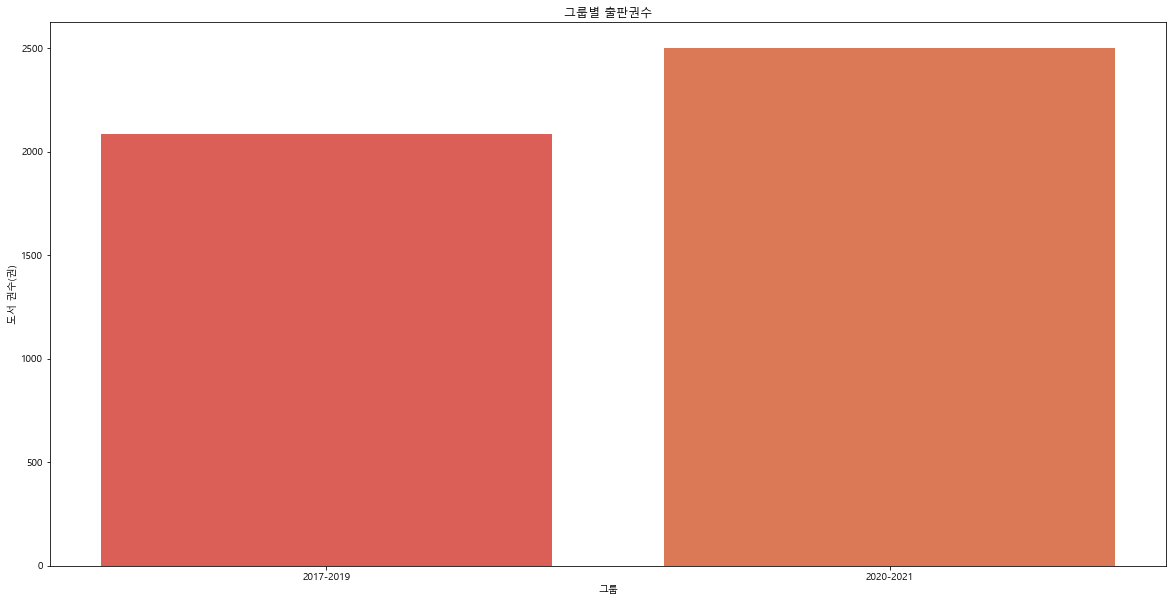

In [316]:
x = ["2017-2019", "2020-2021"]
y = [len(group_two), len(group_one)]
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls', len(tmp_kor["출판사"]))
plt.bar(x,y, color=colors)
plt.title('그룹별 출판권수')
plt.xlabel("그룹")
plt.ylabel("도서 권수(권)")
plt.show()

- 이렇게 시각화를 통해 보면 두 그룹 총 출판 권수에 차이가 있음이 분명히 보인다. 대략 5000권 가량 정도가 더 많이 출판되었다.

#### 언어별 연도수 출판 권수 차이 보기

In [317]:
result_book.head()

,index,keyword,title,publisher,price,discount,pubdate,isbn
0,0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,28800.0,20201030,1165213192 9791165213190
1,1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000.0,22500.0,20201008,8956748578 9788956748573
2,2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060.0,NaN,20211005,1680508237 9781680508239
3,3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000.0,25500.0,20210225,118557879X 9791185578798
4,4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730.0,NaN,20211019,1492056359 9781492056355


In [319]:
group_one["keyword"].value_counts()

Python          1380
Java             266
C                166
SQL              165
R                156
PHP              124
C++              106
C#                79
JavaScript        47
Visual Basic      11
Name: keyword, dtype: int64

In [328]:
total_count_data = pd.DataFrame(data=group_one["keyword"].value_counts())
total_count_data.head()

,keyword
Python,1380
Java,266
C,166
SQL,165
R,156


In [329]:
total_count_data.reset_index(inplace=True)
total_count_data.head()

,index,keyword
0,Python,1380
1,Java,266
2,C,166
3,SQL,165
4,R,156


In [330]:
total_count_data = total_count_data.rename(columns={"index": "언어", "keyword": "2020-2021권수"})
total_count_data.head()

,언어,2020-2021권수
0,Python,1380
1,Java,266
2,C,166
3,SQL,165
4,R,156


In [320]:
group_two["keyword"].value_counts()

Python          434
Java            317
R               291
C               232
JavaScript      231
SQL             161
PHP             138
C++             125
C#              113
Visual Basic     41
Name: keyword, dtype: int64

In [331]:
tmp = pd.DataFrame(data=group_two["keyword"].value_counts())
tmp.reset_index(inplace=True)
tmp = tmp.rename(columns={"index": "언어", "keyword": "2017-2019권수"})
tmp.head()

,언어,2017-2019권수
0,Python,434
1,Java,317
2,R,291
3,C,232
4,JavaScript,231


In [332]:
total_count_data = pd.merge(total_count_data, tmp, on="언어")
total_count_data

,언어,2020-2021권수,2017-2019권수
0,Python,1380,434
1,Java,266,317
2,C,166,232
3,SQL,165,161
4,R,156,291
5,PHP,124,138
6,C++,106,125
7,C#,79,113
8,JavaScript,47,231
9,Visual Basic,11,41


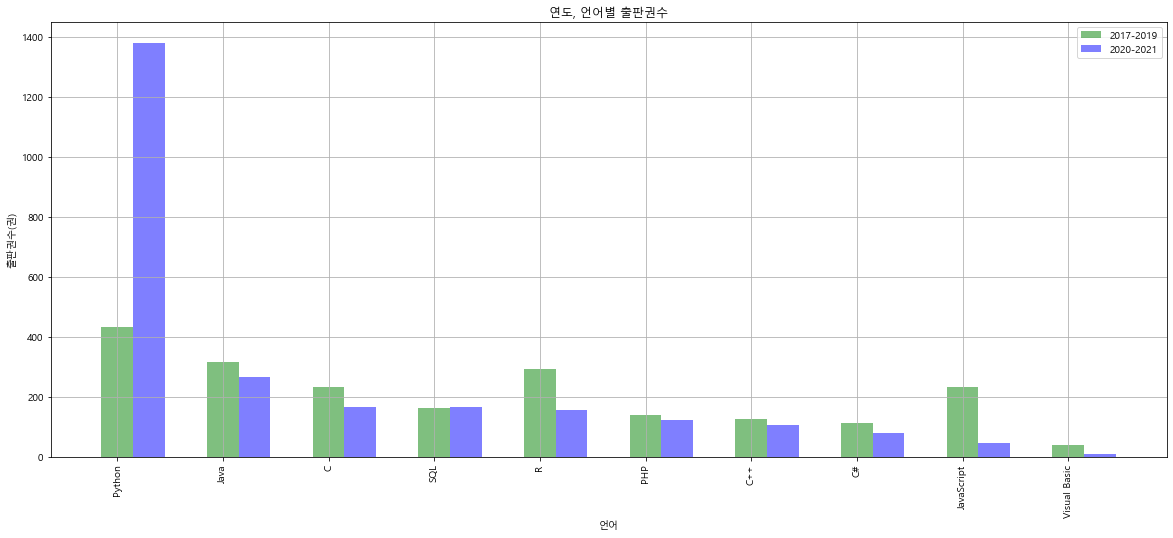

In [335]:
plt.figure(figsize=(20, 8))
x = np.array(range(len(total_count_data["언어"])))
w = 0.3
label = list(total_count_data["언어"].values)

plt.bar(x, total_count_data["2017-2019권수"],
             width = w, 
             color='g', 
             alpha=0.5,
)
x = x + w
plt.bar(x, total_count_data["2020-2021권수"],
             width = w,
             color='b', 
             alpha=0.5,
)
plt.legend(labels=["2017-2019", "2020-2021"])
plt.grid(True)
plt.title("연도, 언어별 출판권수")
plt.xlabel("언어")
plt.xticks(np.arange(len(label)), label,rotation="vertical")
plt.ylabel("출판권수(권)")
plt.show()

```
위데이터를 보면 다른 언어책들은 2017-2019년도에비해 2020-2021년도에 출판권수가 전체적으로 줄어든 경향을 볼 수 있다.
하지만 파이썬은 반대로 2020-2021년도 출판권수가 급등했다. 특히 2017-2019년도에는 자바와 별 차이가 없었으나 2020-2021년도에 들어선 후 급격하게 출판 부수 차이가 나는점이 눈에 띈다.
실제로 티오베 지수에서도 작년에는 3위였으나 올해 급속도로 인기지수가 높아진걸 실감할 수 있는 데이터 인것 같다.

```